<a href="https://colab.research.google.com/github/archaajayaram/project/blob/main/gold_price_prediction_and_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data (1).csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,DS,SPX,Y,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,DS,SPX,Y,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DS       2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   Y        2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,Y,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1 Positive Correlation

2 Negative Correlation

In [ ]:
correlation = gold_data.corr()

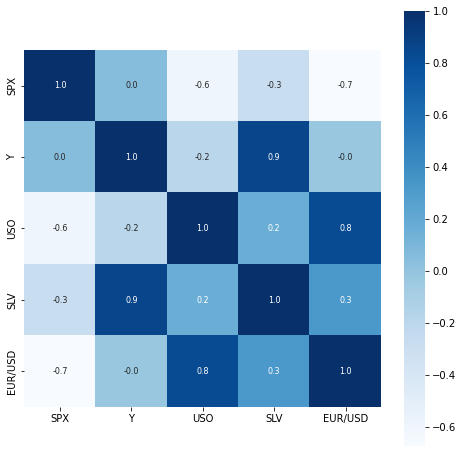

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['Y'])

SPX        0.049345
Y          1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: Y, dtype: float64


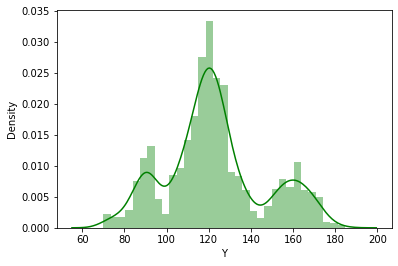

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['Y'],color='green')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['DS','Y'],axis=1)
Y = gold_data['Y']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: Y, Length: 2290, dtype: float64


Splitting into Training data and Test Data



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [ ]:
regressor_model1 = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor_model1.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
y_pred_regressor_model1 = regressor_model1.predict(X_test)

In [ ]:
A=y_pred_regressor_model1

In [ ]:
print(y_pred_regressor_model1)

[168.51039922  82.07529979 115.95710043 127.43850068 120.71440155
 154.91529735 150.05789894 126.15090063 117.55859884 126.03900055
 116.86110067 171.6933009  141.69069919 167.77389818 115.17809983
 117.73780079 139.3765027  170.2871006  159.57740291 157.96360019
 155.16660012 125.38380022 176.60689902 156.65520359 125.21840047
  93.97529992  77.43650023 120.61789988 119.11429952 167.5705995
  88.33090062 125.08130018  91.42630051 117.68220025 121.09779917
 136.18270096 115.35510128 115.46130061 146.49949919 106.94370083
 103.99540251  87.20589779 126.58980071 118.10920022 152.62749927
 119.67089986 108.35580013 107.97249779  93.2125006  127.2677975
  74.24680027 113.62019913 121.72080004 111.31129885 118.99319908
 120.74879928 159.7416998  168.33570112 146.62899656  85.78279888
  94.50180067  86.79249906  90.45930047 118.94200073 126.42120035
 127.52450024 170.62659968 122.33029923 117.46329889  98.45680006
 168.26560063 142.87679844 132.07930218 121.1745021  121.84759916
 119.6473008

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, y_pred_regressor_model1)
print("R squared error : ", error_score)

R squared error :  0.9888686013874814


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

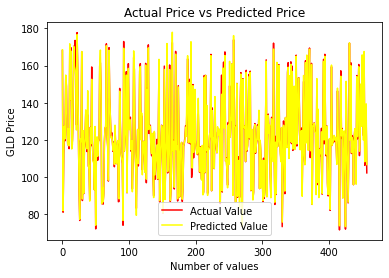

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(y_pred_regressor_model1, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

forecasting future prices


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  
mse=sqrt(mean_squared_error(Y_test,y_pred_regressor_model1))


In [ ]:
print(mse)

2.276628064146013


In [ ]:
mae=mean_absolute_error(y_pred_regressor_model1,Y_test)

In [ ]:
print(mae)

1.305330327270738


In [ ]:
mape=mean_absolute_percentage_error(y_pred_regressor_model1,Y_test)

In [ ]:
print(mape)

0.010414933550209043


In [ ]:
rmse_rf = np.sqrt(mean_squared_error(y_pred_regressor_model1,Y_test))

In [ ]:
rmse_rf

2.276628064146013

Model Training: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model2=LinearRegression()

In [ ]:
lin_model2.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on Test Data
lin_pred=lin_model2.predict(X_test)

In [ ]:
print(lin_pred)

[159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.69577146
 120.03159609 1

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, lin_pred)
print("R squared error : ", error_score)

R squared error :  0.8657886565869237


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

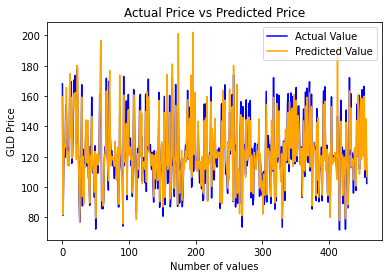

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(lin_pred, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  
mse=sqrt(mean_squared_error(Y_test,lin_pred ))

In [ ]:
print(mse)

8.413614015226472


In [ ]:
mae=mean_absolute_error(lin_pred,Y_test)

In [ ]:
print(mae)

5.911486735777762


In [ ]:
mape=mean_absolute_percentage_error(lin_pred,Y_test)

In [ ]:
print(mape)

0.04536794320781582


In [ ]:
rmse_rf = np.sqrt(mean_squared_error(Y_test,lin_pred))

In [ ]:
print(rmse_rf)

8.413614015226472


forecasting


In [ ]:
import plotly.express as px
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose as sd
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import missingno as msno
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame(gold_data)

In [ ]:
df.rename(columns = {'Date':'ds', 'GLD':'y'}, inplace = True)

In [ ]:
df.rename(columns = {'Date':'ds', 'GLD':'y'}, inplace = True)

In [ ]:
(df)

,DS,SPX,Y,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
df.drop(['SPX', 'USO', 'SLV', 'EUR/USD'], axis = 1)

,DS,Y
0,1/2/2008,84.860001
1,1/3/2008,85.570000
2,1/4/2008,85.129997
3,1/7/2008,84.769997
4,1/8/2008,86.779999
...,...,...
2285,5/8/2018,124.589996
2286,5/9/2018,124.330002
2287,5/10/2018,125.180000
2288,5/14/2018,124.489998


In [ ]:
df = pd.DataFrame({'Date': pd.date_range(start = '1/2/2008', end = '5/16/2018', freq = 'd')})
df['ds'] = df['Date'].dt.strftime('%m/%d/%Y')

In [ ]:
df

,Date,ds
0,2008-01-02,01/02/2008
1,2008-01-03,01/03/2008
2,2008-01-04,01/04/2008
3,2008-01-05,01/05/2008
4,2008-01-06,01/06/2008
...,...,...
3783,2018-05-12,05/12/2018
3784,2018-05-13,05/13/2018
3785,2018-05-14,05/14/2018
3786,2018-05-15,05/15/2018


In [ ]:
X= df

In [ ]:
train_gold_data= pd.DataFrame()
train_gold_data['ds'] = pd.to_datetime(X["Date"])
train_gold_data['y']=y
train_gold_data.head(2)

,ds,y
0,2008-01-02,1447.160034
1,2008-01-03,1447.160034


In [ ]:
prophet_basic = Prophet()
prophet_basic.fit(train_gold_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future= prophet_basic.make_future_dataframe(periods=3000)

In [ ]:
future

,ds
0,2008-01-02
1,2008-01-03
2,2008-01-04
3,2008-01-05
4,2008-01-06
...,...
6783,2026-07-29
6784,2026-07-30
6785,2026-07-31
6786,2026-08-01


In [ ]:
forecast=prophet_basic.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
6783,2026-07-29,10250.552441,-23399.261164,42804.333451
6784,2026-07-30,10253.304363,-23428.250034,42798.428001
6785,2026-07-31,10253.806830,-23529.674290,42859.603055
6786,2026-08-01,10253.636763,-23521.397583,42892.847609
6787,2026-08-02,10254.499887,-23480.121133,42971.636825


In [ ]:
f =forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

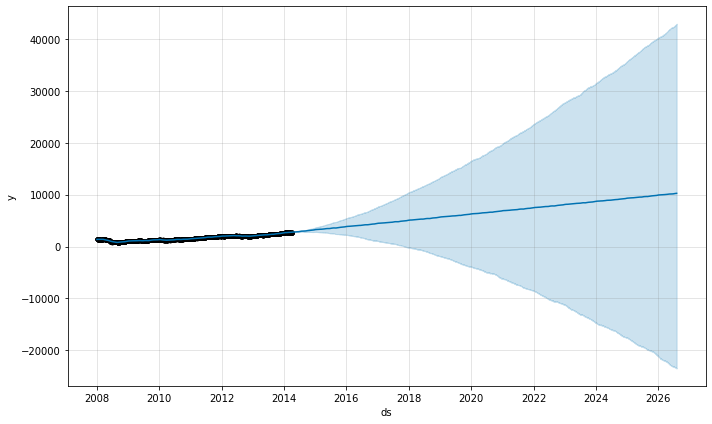

In [ ]:
fig1 = prophet_basic.plot(forecast)

In [ ]:
from sklearn.metrics import accuracy_score  
from sklearn.linear_model import LogisticRegression 

In [ ]:
lr_model3 = LogisticRegression()  
lr_model3.fit(X_train, Y_train) 

ValueError: ignored